In [12]:
import networkx as nx
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from tqdm import tqdm  #this is just for showing progress bars

In [5]:
#Just an example of graph: https://en.wikipedia.org/wiki/Erd%C5%91s%E2%80%93R%C3%A9nyi_model
#Parameters: number of nodes, 
graph = nx.erdos_renyi_graph(20, 0.4)

In [6]:
#create ising model on the graph
size = graph.number_of_nodes()

#list_of_neigh is an array of size 'size' that contains the neighbor of each node
list_of_neigh = {}
for node in graph.nodes():
    list_of_neigh[node] = list(graph.neighbors(node))

In [7]:
#set parameters for the simulation
J = 1.0   #interaction strenght / coupling constant
temperature_range = np.arange(1,10, 0.1)
initial_state = 1
iterations = 10000

In [8]:
#Initialize the model

# random.choice generates a random sample from a given 1-D array.
# Parameters: 1D array, output shape, p: probability associated with each entry (default is uniform)
# In this case the array is just [-1,1], and the probaility is  p(-1) = 1-initial_state  and  p(1) = initial_state
# so if initial_state = 1, the state will surelly be 1.
#    if initial_state = 0, the state will surelly be -1.

state = np.random.choice([-1,1], size, p=[1-initial_state, initial_state])

In [9]:
# Simulate the model given for a (single) given temperature
def simulate(temperature):

    for i in range(iterations):
        #Montecarlo
        beta = 1/temperature
        rsnode = np.random.randint(0, size)         # pick a random source node
        s = state[rsnode]                           # get the spin of this node
        ss = np.sum(state[list_of_neigh[rsnode]])   # sum of all neighbouring spins
        delE = 2.0 * J * ss * s                     # transition energy
        prob = math.exp(-delE * beta)               # calculate transition probability
        if prob > random.random():                  # conditionally accept the transition
            s = -s                                      # transition (from -1 to 1 and viceversa)
        state[rsnode] = s
        #end montecarlo

        temp_mag = np.sum(state)

        temp_ene = 0.
        for node in range(size):
            ss = np.sum(state[list_of_neigh[node]]) #sum of neighbouring spins
            temp_ene += state[node] * ss
        
    #Energy = -J ∑_{i,j} S_i S_j    there is a 0.5 factor to avoid counting the couples twice
    return np.abs(temp_mag)/float(size),  -0.5 * J * temp_ene

#example:
# ex_temp = 3
# ex_mag, ex_ene = simulate(ex_temp)

# print(ex_mag)
# print(ex_ene)


In [15]:
# Simulate and visualise the energy and magnetization wrt a temperature range.
# i.e. Repeatedly call simulate function with different temperature

# all zeros at first
mag = np.zeros(len(temperature_range))
ene = np.zeros(len(temperature_range))

for i in tqdm(range(len(temperature_range))):   #This is shows progress bars with tqdm..
#for i in range(len(temperature_range)):        #..but this works the same
    # print(" Temp : " + str(temperature[i]))
    mag[i], ene[i] = simulate(temperature_range[i])

Text(0.5, 1.0, 'Energy vs Temperature')

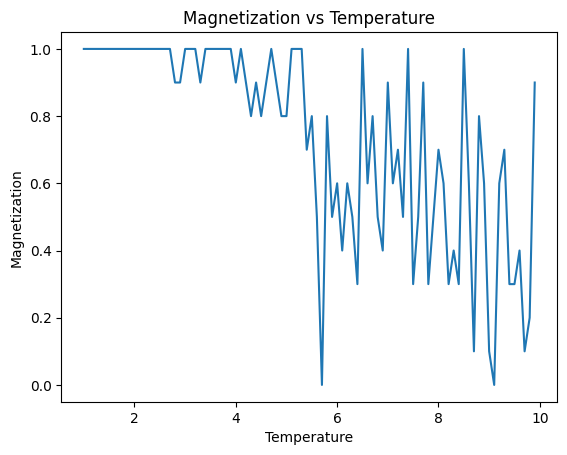

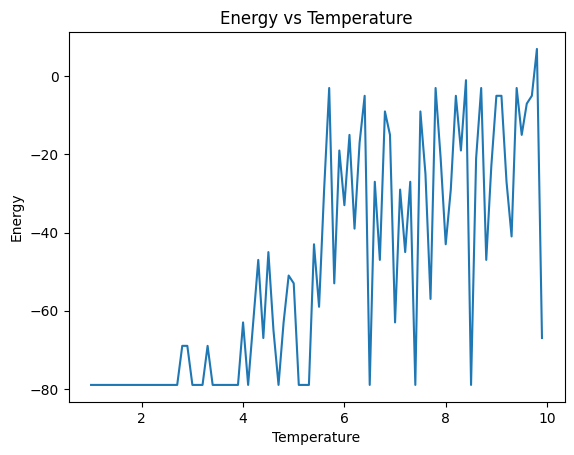

In [14]:
# Visualize the data
plt.figure()
plt.plot(temperature_range, mag)
plt.xlabel('Temperature')
plt.ylabel('Magnetization')
plt.title('Magnetization vs Temperature')

plt.figure()
plt.plot(temperature_range, ene)
plt.xlabel('Temperature')
plt.ylabel('Energy')
plt.title('Energy vs Temperature')